<div class="alert alert-block alert-success">
    <h1>EDA on Data Science Job Salaries</h1>
</div>

<div class="alert alert-block alert-info">
    <h4>Import Libaries</h4>
</div>

First, importing necessary libraries:

In [1]:
import opendatasets as od
import jovian as jv
import os
import country_converter as coco
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns

<IPython.core.display.Javascript object>

<div class="alert alert-block alert-info">
    <h4>Download Dataset</h4>
</div>

Second, downloading the dataset:

In [2]:
dataset_url = 'https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries'
od.download(dataset_url)

Skipping, found downloaded files in "./data-science-job-salaries" (use force=True to force download)


In [3]:
for dirpath, _, files in os.walk('./data-science-job-salaries'):
    for file in files:
        print(os.path.join(dirpath, file))

./data-science-job-salaries/ds_salaries.csv


In [4]:
datafile = './data-science-job-salaries/ds_salaries.csv'

<div class="alert alert-block alert-info">
    <h4>About Dataset</h4>
</div>

Data Science Job Salaries Dataset contains 11 columns, each are:
* `work_year`: The year the salary was paid
* `experience_level`: The experience level in the job during the year
* `employment_type`: The type of employment for the role
* `job_title`: The role worked in during the year
* `salary`: The total gross salary amount paid
* `salary_currency`: The currency of the salary paid
* `salary_in_usd`: The salary in USD
* `employee_residence`: Employee's primary country of residence in during the work year
* `remote_ration`: The overall amount of work done remotely
* `company_location`: The country of the employer's main office or contracting branch
* `company_size`: The median number of people that worked for the company during the year

<div class="alert alert-block alert-info">
    <h4>Data Preparation & Cleaning</h4>
</div>

Third, reading the datafile:

In [5]:
df = pd.read_csv(datafile, index_col=0)

Lets have a look at first five entries:

In [6]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


Removing unnecessary columns:

In [7]:
df.drop(columns=["salary", "salary_currency"], inplace=True)

Converting country code from ISO 3166 to ISO3

In [8]:
df["employee_residence"] = coco.convert(names=df["employee_residence"], to="ISO3")
df["company_location"] = coco.convert(names=df["company_location"], to="ISO3")

Q. Is there any missing value presents?

In [9]:
df.isnull().any().any()

False

Oh great! Good for us that no missing value on the dataset.

In [10]:
nrows, ncols = df.shape
print(
    f"There are total {ncols} columns and {nrows} rows, thus comprising {np.prod([nrows, ncols])} values."
)

There are total 9 columns and 607 rows, thus comprising 5463 values.


Lets see, the information about columns:

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 47.4+ KB


We've got:
* 3 numeric columns
    1. `work_year`
    1. `salary_in_usd`
    1. `remote_ratio`
* 6 categorical columns
    1. `experience_level`
    1. `employment_type`
    1. `job_title`
    1. `employee_residence`
    1. `company_location`
    1. `company_size`

In [12]:
df.describe() # statistical measure of numerical columns

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


<div class="alert alert-block alert-info">
    <h4>Experience Level</h4>
</div>

In [13]:
exp_lev = df["experience_level"]  # alias for the column

In [14]:
# How many unique values does this column have?
exp_lev.nunique()

4

In [15]:
# Frequency count of those four unique values
fcnt_exp_lev = exp_lev.value_counts()
fcnt_exp_lev

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

There're 4 categorical values in column `experience_level`, each are:
* `EN`: Entry-level / Junior
* `MI`: Mid-level / Intermediate
* `SE`: Senior-level / Expert
* `EX`: Executive-level / Director

In [16]:
exp_lev_map = {
    "EN": "Entry-level",
    "MI": "Mid-level",
    "SE": "Senior-level",
    "EX": "Excutive-level",
}

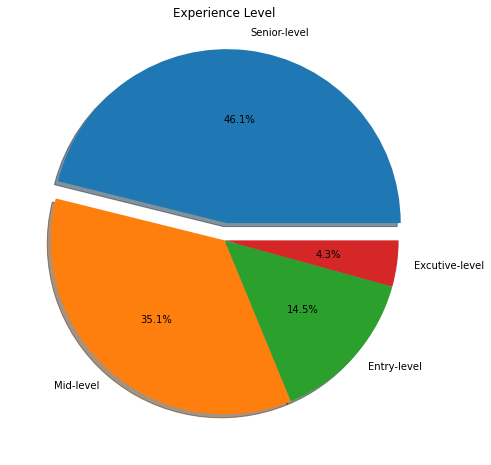

In [17]:
plt.figure(figsize=(16, 8))
plt.pie(
    x=fcnt_exp_lev,
    labels=[exp_lev_map[x] for x in fcnt_exp_lev.index],
    explode=[0.1, 0, 0, 0],
    shadow=True,
    autopct="%.1f%%",
)
plt.title("Experience Level");

From the pie chart above, we can notice that **Senior-level/Expert** acounts for **46%**, and **Mid-level/Intermediate** ranked the next.

There's only **4.3%** of **Executive-level/Director**.

<div class="alert alert-block alert-info">
    <h4>Job Titles</h4>
</div>

In [18]:
job_title = df["job_title"]  # alias for the column

In [19]:
# How many unique values does this column have?
job_title.nunique()

50

In [20]:
# Frequency count top 10 job titles
fcnt_job_title = job_title.value_counts().sort_values(ascending=False).head(10)

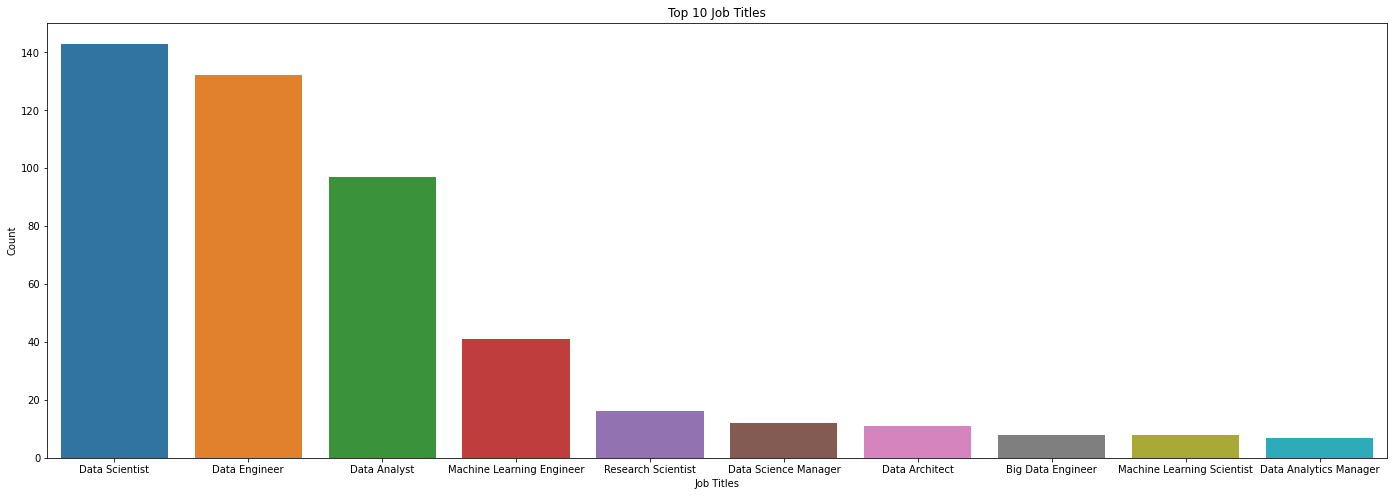

In [21]:
plt.figure(figsize=(24, 8))
sns.barplot(x=fcnt_job_title.index, y=fcnt_job_title)
plt.title("Top 10 Job Titles")
plt.xlabel("Job Titles")
plt.ylabel("Count");

**Data Scientist**, **Data Engineer** and **Data Analyst** ranked top 3 frequent job titles, but it can be easily seen that others are also related to those top 3 job titles.

<div class="alert alert-block alert-info">
    <h4>Employment Type</h4>
</div>

In [22]:
emp_type = df["employment_type"]  # alias for the column

In [23]:
# How many unique values does this column have?
emp_type.nunique()

4

In [24]:
# Frequency count of those 4 unique values
fcnt_emp_type = emp_type.value_counts()
fcnt_emp_type

FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64

There're 4 categorical values in column `employment_type`, each are:
* `PT`: Part-time
* `FT`: Full-time
* `CT`: Contract
* `FL`: Freelance

In [25]:
emp_type_map = {
    "PT": "Part-time",
    "FT": "Full-time",
    "CT": "Contract",
    "FL": "Freelance",
}

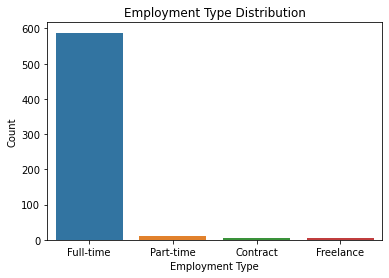

In [26]:
sns.barplot(x=[emp_type_map[x] for x in fcnt_emp_type.index], y=fcnt_emp_type)
plt.title("Employment Type Distribution")
plt.xlabel("Employment Type")
plt.ylabel("Count");

Easily seen that most of employee types are **full-time**.

<div class="alert alert-block alert-info">
    <h4>Employee Residence & Company Location</h4>
</div>

In [27]:
emp_res = df["employee_residence"]  # alias for the column
fcnt_emp_res = emp_res.value_counts().reset_index()

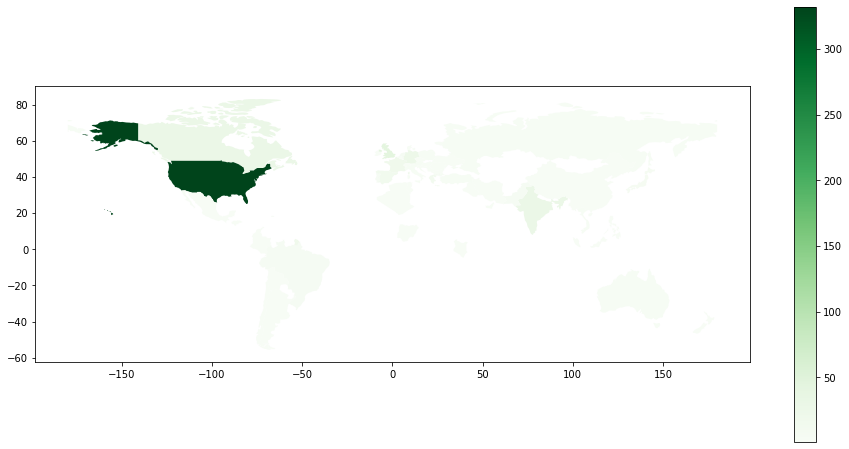

In [28]:
df_world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
df_world_merged = df_world.merge(
    fcnt_emp_res, how="left", left_on=["iso_a3"], right_on=["index"]
)
df_world_merged.plot(column="employee_residence", cmap="Greens", figsize=(16, 8), legend=True);

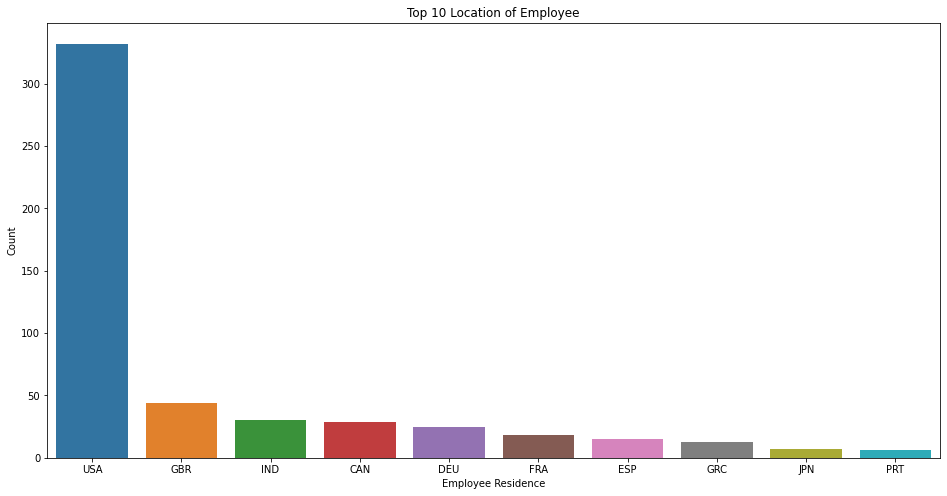

In [29]:
fcnt_emp_res = emp_res.value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(16, 8))
sns.barplot(x=fcnt_emp_res.index, y=fcnt_emp_res)
plt.title("Top 10 Location of Employee")
plt.xlabel("Employee Residence")
plt.ylabel("Count");

From above, it is obvious that most of the employees are from **USA**, followed by **GBR** and **IND**.

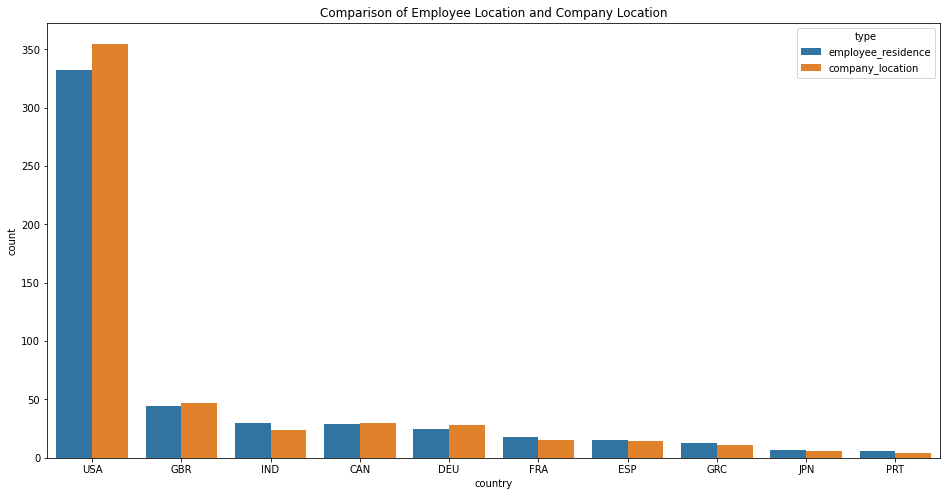

In [30]:
top_emp_res = df["employee_residence"].value_counts()
top_cmp_loc = df["company_location"].value_counts()
x = (
    pd.merge(top_emp_res, top_cmp_loc, right_index=True, left_index=True)
    .sort_values(["employee_residence", "company_location"], ascending=False)
    .head(10)
    .reset_index()
)
x = pd.melt(x, id_vars="index", var_name="type", value_name="count")
plt.figure(figsize=(16, 8))
sns.barplot(data=x, x="index", y="count", hue="type")
plt.title("Comparison of Employee Location and Company Location")
plt.xlabel("country");

We can notice that **USA**, **GBR**, **CAN** and **DEU** have higher count of company location than employee location as shown above.

<div class="alert alert-block alert-info">
    <h4>Company Size</h4>
</div>

In [31]:
comp_size = df["company_size"]  # alias for the column

In [32]:
# How many unique values does this column have?
comp_size.nunique()

3

In [33]:
# Frequency count of those three unique values:
fcnt_comp_size = comp_size.value_counts().sort_values()
fcnt_comp_size

S     83
L    198
M    326
Name: company_size, dtype: int64

There're 3 categorical values in column `company_size`, each are:
* `S`: Small (less than 50 employees)
* `M`: Medium (50 to 250 employees)
* `L`: Large (more than 250 employees)

In [34]:
comp_size_map = {"S": "Small", "M": "Medium", "L": "Large"}

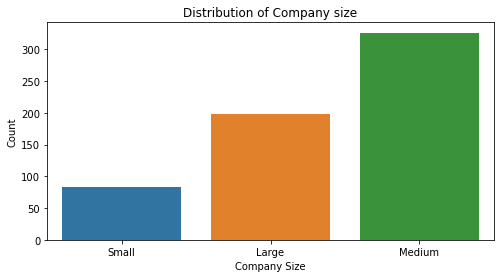

In [35]:
plt.figure(figsize=(8, 4))
sns.barplot(x=[comp_size_map[x] for x in fcnt_comp_size.index], y=fcnt_comp_size)
plt.title("Distribution of Company size")
plt.xlabel("Company Size")
plt.ylabel("Count");

It can be easily seen that company size mostly consists of **medium size**, and the **large size** ranked the next.

<div class="alert alert-block alert-info">
    <h4>Work Year</h4>
</div>

In [36]:
work_year = df["work_year"]  # alias for the column

In [37]:
# How many unique values does this column have?
work_year.nunique()

3

In [38]:
# Frequency count of those 3 unique values
fcnt_work_year = work_year.value_counts()

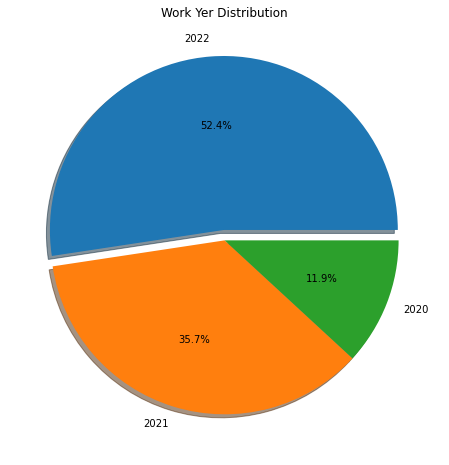

In [39]:
plt.figure(figsize=(16, 8))
plt.pie(
    x=fcnt_work_year,
    labels=fcnt_work_year.index,
    explode=[0.06, 0, 0],
    shadow=True,
    autopct="%.1f%%",
)
plt.title("Work Yer Distribution");

2022 year data accounts for **52.4%** in the dataset, the next is 2021, which accounts for **35.7%**.

<div class="alert alert-block alert-info">
    <h4>Salary in USD</h4>
</div>

In [40]:
sal_usd = df["salary_in_usd"]  # alias for the column

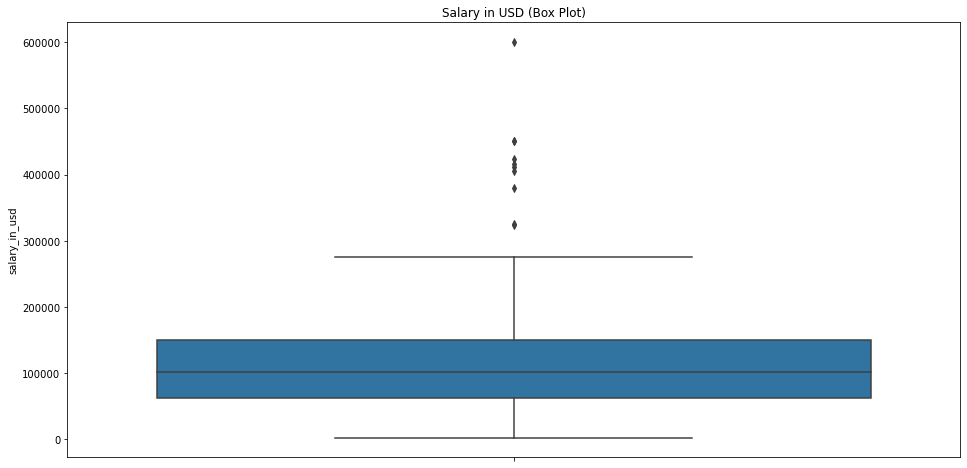

In [41]:
plt.figure(figsize=(16, 8))
sns.boxplot(y=sal_usd)
plt.title("Salary in USD (Box Plot)");

<Figure size 1152x576 with 0 Axes>

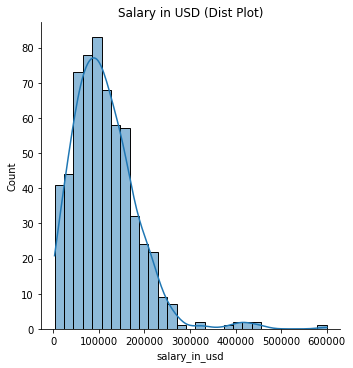

In [42]:
plt.figure(figsize=(16, 8))
sns.displot(x=sal_usd, kde=True)
plt.title("Salary in USD (Dist Plot)");

Salary in USD as above, we can see that salary mostly distributed between **100K** and **150K**.

<div class="alert alert-block alert-info">
    <h4>Remote Ratio</h4>
</div>

In [43]:
rem_ratio = df["remote_ratio"]  # alias for the column

In [44]:
# How many unique values does this column have?
rem_ratio.nunique()

3

In [45]:
# Frequency count of those three unique values:
fcnt_rem_ratio = rem_ratio.value_counts().sort_values()
fcnt_rem_ratio

50      99
0      127
100    381
Name: remote_ratio, dtype: int64

There're 3 categorical values in column `remote_ratio`, each are:
* `0`: No remote work
* `50`: Partially remote
* `100`: Fully remote

In [46]:
comp_size_map = {0: "No-remote", 50: "Partially-remote", 100: "Fully-remote"}

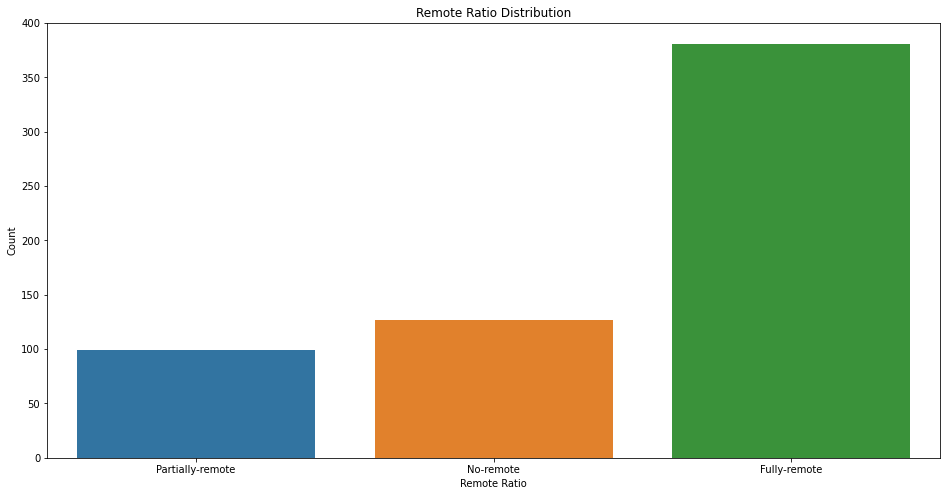

In [47]:
plt.figure(figsize=(16, 8))
sns.barplot(x=[comp_size_map[x] for x in fcnt_rem_ratio.index], y=fcnt_rem_ratio)
plt.title("Remote Ratio Distribution")
plt.xlabel("Remote Ratio")
plt.ylabel("Count");

381 of works are **fully remoted**, and **no remote work** ranked the next, with count 127.

<div class="alert alert-block alert-info">
    <h4>Q1. Visualize the average salaries by the company location.</h4>
</div>

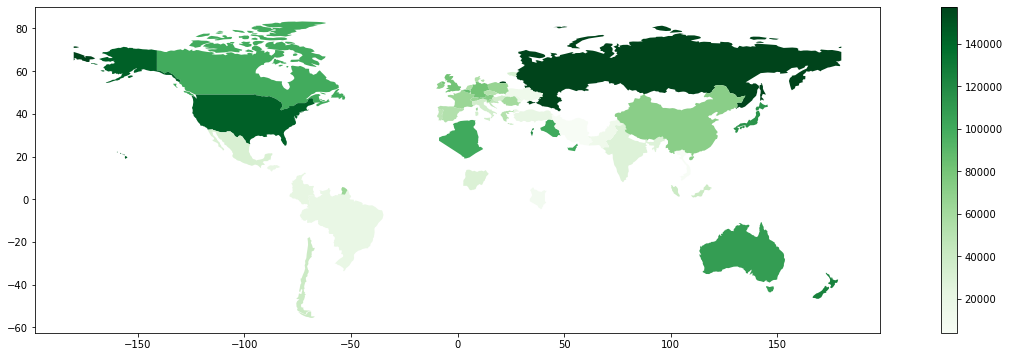

In [48]:
sal_mean_loc = df.groupby('company_location')['salary_in_usd'].mean().reset_index()
df_world_merged = df_world.merge(
    sal_mean_loc, how="left", left_on=["iso_a3"], right_on=["company_location"]
)
df_world_merged.plot(column="salary_in_usd", cmap="Greens", figsize=(22, 6), legend=True);

Higher average salaries have brighter colors, while lower average salaries have darker colors.  
Here we can see that **USA** and **Russia** have higher average salaries and brighter colors.

<div class="alert alert-block alert-info">
    <h4>Q2. Visualize the highest salaries by job titles.</h4>
</div>

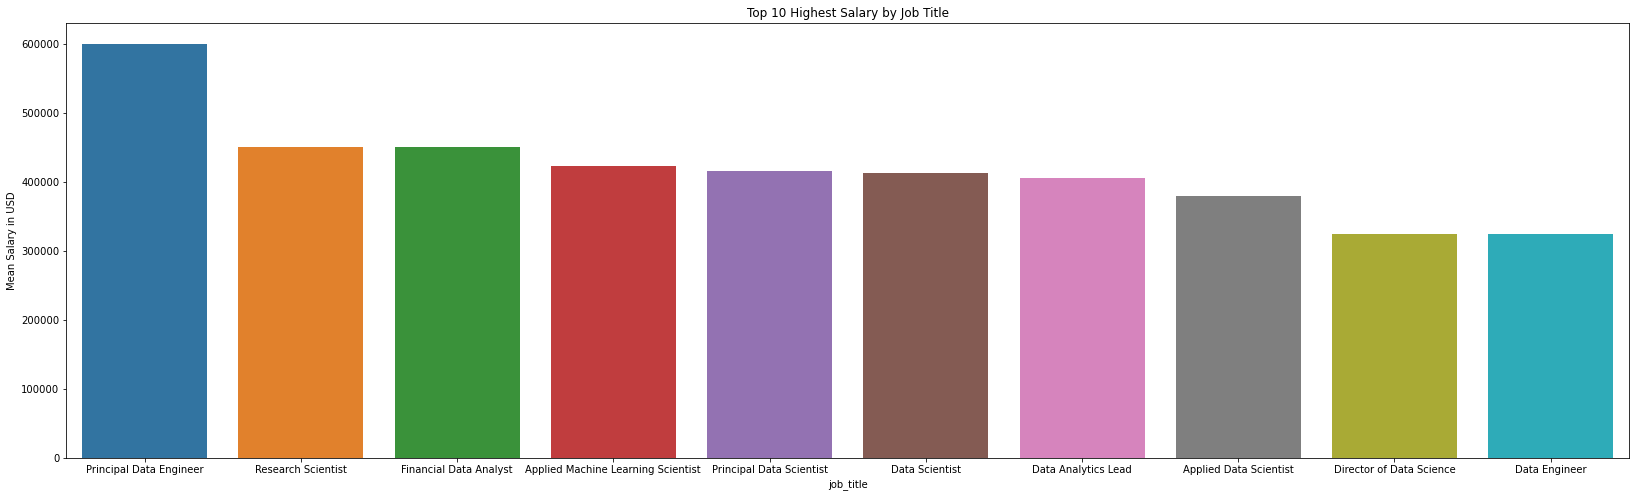

In [49]:
salary_job = df.groupby(['salary_in_usd', 'job_title']).size().reset_index().sort_values('salary_in_usd', ascending=False).head(10)
plt.figure(figsize=(28, 8))
sns.barplot(data=salary_job, x='job_title', y='salary_in_usd')
plt.ylabel('Mean Salary in USD')
plt.title('Top 10 Highest Salary by Job Title');

Cleary, **Principal Data Engineer** have the highest average salary.

<div class="alert alert-block alert-info">
    <h4>Q3. Visualize average salary by company size.</h4>
</div>

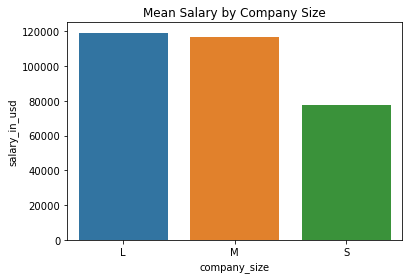

In [50]:
com_size_sal = df.groupby('company_size')['salary_in_usd'].mean().reset_index()
sns.barplot(data=com_size_sal, x='company_size', y='salary_in_usd')
plt.title('Mean Salary by Company Size');

Blue, Orange and Green lines stand for **Large**, **Mid**, and **Small** company size respectively.

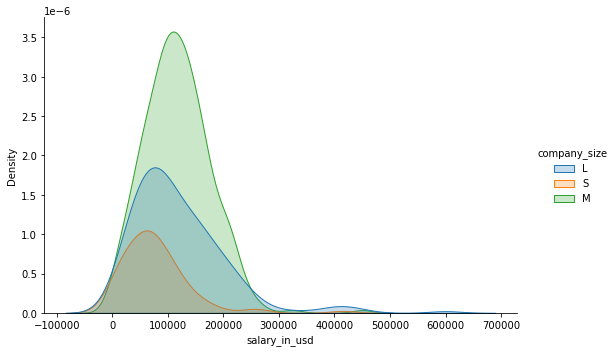

In [51]:
sns.displot(data=df, x='salary_in_usd', hue='company_size', kind='kde', fill=True, height=5, aspect=1.5);

It is obvious that **Medium** size company distributed along with higher salaries, and **Large** size company has higher salaries than **Small** size company.  
Thus, we can get a conclusion as large size company not necessarily has higher salaries than medium size company.

<div class="alert alert-block alert-info">
    <h4>Q4. Visualize salary distribution by experience level.</h4>
</div>

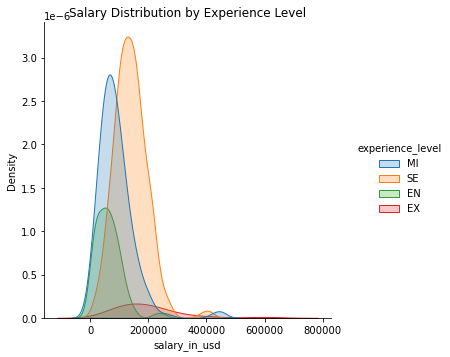

In [52]:
sns.displot(data=df, x='salary_in_usd', hue='experience_level', kind='kde', fill=True)
plt.title('Salary Distribution by Experience Level');

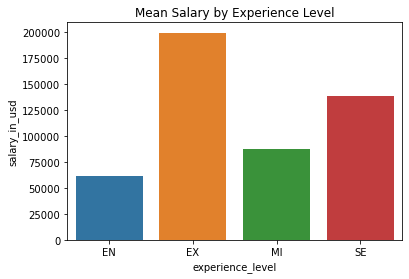

In [53]:
exp_sal = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()
sns.barplot(data=exp_sal, x='experience_level', y='salary_in_usd')
plt.title('Mean Salary by Experience Level');

One can see that entry-level is distributed along with lower salaries, while the executive-level is plotted along higher salaries.

<div class="alert alert-block alert-info">
    <h4>Conclusion</h4>
</div>

1. Large size company not necessarily has higher salaries.
2. USA and Russia has higher mean salaries.
3. Principal Data Engineer have the highest average salary.
4. Entry-level has lower mean salary while the expert experience level has higher mean salary.

<div class="alert alert-block alert-info">
    <h4>Upload on Jovian.ml</h4>
</div>

In [ ]:
jv.commit(filename='EDA on Data Science Job Salaries.ipynb', project='EDA on Data Science Job Salaries')

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY:

  ········
